# helper functions
https://github.com/QCoDeS/Qcodes/blob/master/docs/examples/driver_examples/Qcodes%20example%20with%20Rohde%20Schwarz%20ZNB.ipynb 

In [1]:
import os, sys
import matplotlib.pyplot as plt
import qcodes as qc
import numpy as np
from datetime import datetime, timedelta


#import instrument
import qcodes.instrument_drivers.rohde_schwarz.ZNB as ZNB

from qcodes.dataset.measurements import Measurement
from qcodes.dataset.plotting import plot_by_id, load_by_id
from qcodes.dataset.data_export import get_data_by_id


#Analysis
#from characterizations.characterizations import resonators as res
#from characterizations.characterizations.fitter import fit

In [2]:
%matplotlib inline

In [4]:
#initialize database
import datetime

def initialize_database(datestamp='20190504', dataset_name = 'ABS_W1_5_1_1', path=r'D:\OneDrive\BF3\Data\\'):
    """
    Quick helper function that sets the database
    """
    qc.config["core"]["db_location"] = datetime.date.today().strftime(path+datestamp+'_'+dataset_name+'.db')
    qc.dataset.database.initialise_database()
    print("database set to",qc.config.core.db_location)

In [5]:
#initialize database
initialize_database('20190504')

database set to D:\OneDrive\BF3\Data\\20190504_ABS_W1_5_1_1.db


In [9]:
def get_f0s_from_data(data_id):
    data = load_by_id(data_id)
    freqs = np.squeeze(np.array(data.get_data('frequency')))
    mag = np.squeeze(np.array(data.get_data('magnitude_dB')))
    amp = np.squeeze(np.array(data.get_data('mag')))
    phase = np.squeeze(np.array(data.get_data('phase')))
    #gates = np.squeeze(np.array(data.get_data('V_cut_A')))

    f0s = freqs[1,np.argmin(mag[:,:],axis=1)]
    return f0s

def unpack_data(data_id, col_names = ['frequency', 'mag', 'phase', 'magnitude_dB']):
    """ 
    Just loads the data from database to numpy arrays
    specifying columns with the list arguments
    """
    data = load_by_id(data_id)
    data_dict = {}
    for col_name in col_names:
        data_dict[col_name] = np.squeeze(np.array(data.get_data(col_name))) #somehow they added empty dimensions in qcodes. or maybe that is just my bad saving 
    
    return data_dict

def plot_readout_point_from_sweep(plot_id, f_readout = 4.84700e9):
    """
    plots readout point in mag vs phase resonance sweep. 
    """
    dat = unpack_data(plot_id, col_names=['frequency', 'phase', 'magnitude_dB', 'magnitude_raw'])
    plt.figure()
    plt.plot(dat['frequency'],dat['magnitude_raw'], '--')
    plt.ylabel('mag')
    plt.twinx()
    plt.plot(dat['frequency'],dat['phase'], '--g')
    plt.axvline(x=f_readout,color='r')
    plt.title('Readout point sweep for sweep #%d, id=#%d' % (plot_id+1, plot_id))
    plt.ylabel('phase')

# frequency analysis of field scans

In [159]:
def plot_fft(data_id):
    data = unpack_data(data_id, col_names = ['B_y', 'mag', 'phase'])
    plt.figure(figsize=(15,4))
    plt.plot( np.fft.fftfreq(len(data['mag']), d=(data['B_y'][1]-data['B_y'][0])),np.abs(np.fft.fft(data['mag'])))
    plt.ylim(0,1)
    
def get_fft(data_id, imin=0, imax=-1):
    data = unpack_data(data_id, col_names = ['B_y', 'mag', 'phase'])
    freqs = np.fft.fftfreq(len(data['mag'][imin:imax]), d=(data['B_y'][1]-data['B_y'][0]))
    mag_fft = np.abs(np.fft.fft(data['mag'][imin:imax]))
    phase_fft = np.abs(np.fft.fft(data['phase'][imin:imax]))
    return freqs, mag_fft, phase_fft
   

## 0506 data

In [15]:
initialize_database('20190506')

database set to D:\OneDrive\BF3\Data\\20190506_ABS_W1_5_1_1.db


(0, 100000.0)

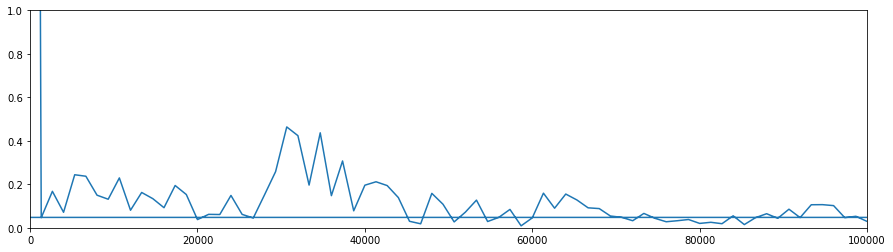

In [23]:
plot_fft(37)
plt.xlim(0,1e5)

(0, 2)

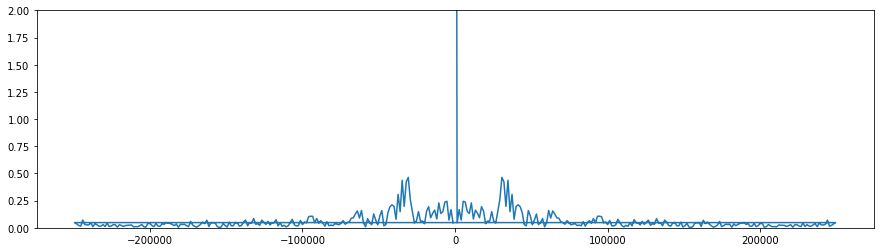

In [10]:
data = unpack_data(37, col_names = ['B_y', 'mag', 'phase'])

plt.figure(figsize=(15,4))
plt.plot( np.fft.fftfreq(len(data['mag']), d=(data['B_y'][1]-data['B_y'][0])),np.abs(np.fft.fft(data['mag'])))
plt.ylim((0,2))
#plt.xlim(0,150e-6)

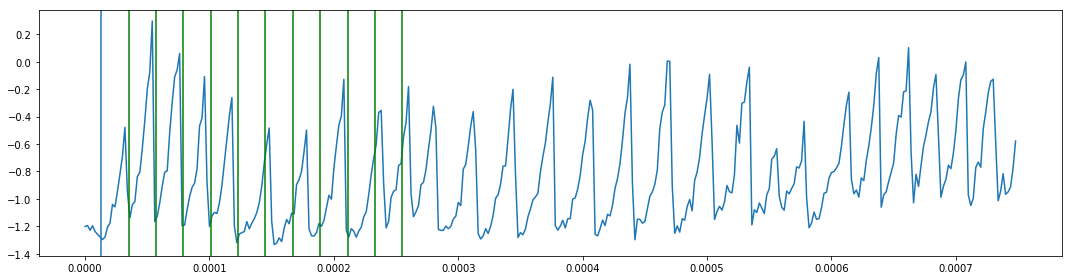

In [12]:
plt.figure(figsize=(15,4))
plt.plot(data['B_y'][0:400],data['phase'][0:400])
plt.tight_layout()
offset = 13e-6
plt.axvline(x=offset)
period = 22e-6
for i in range(1,12):
    plt.axvline(x=offset+i*period, color='g')


        

## 05-09 data

database set to D:\OneDrive\BF3\Data\\20190509_ABS_W1_5_1_1.db
42207.7922078
23.6923076923 uT period


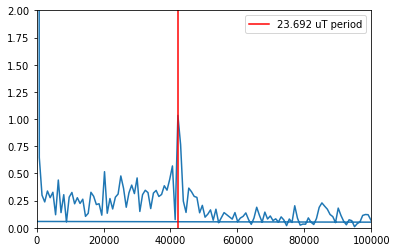

In [49]:
initialize_database('20190509')
freqs, mag_fft, phase_fft = get_fft(3)
plt.figure()
plt.plot(freqs, mag_fft)
plt.xlim(0,1e5)
plt.axvline(x=-freqs[np.argmax(mag_fft[1:]) + 1],color='r', label=('%.3f uT period' % (1/(-freqs[np.argmax(mag_fft[1:]) + 1]) * 1e6)))
plt.ylim(0,2)
print(-freqs[np.argmax(mag_fft[1:]) + 1])
print(1/(-freqs[np.argmax(mag_fft[1:]) + 1]) * 1e6,'uT period' )
plt.legend()

63

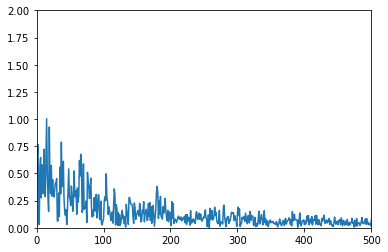

In [109]:
plt.figure()
plt.plot(mag_fft[50:])
plt.ylim(0,2)
plt.xlim(0,500)
np.argmax(mag_fft[2:int(len(mag_fft) /2)])

database set to D:\OneDrive\BF3\Data\\20190509_ABS_W1_5_1_1.db
26020.8166533
38.4307692308 uT period


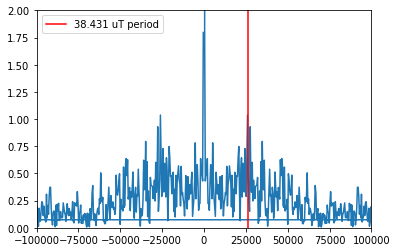

In [160]:
initialize_database('20190509')
freqs, mag_fft, phase_fft = get_fft(8)
plt.figure()
plt.plot(freqs, mag_fft)
plt.xlim(-1e5,1e5)
max_fft = freqs[np.argmax(mag_fft[2:int(len(mag_fft) /2)]) + 2]
plt.axvline(x=max_fft,color='r', label=('%.3f uT period' % ((1/max_fft) * 1e6)))
plt.ylim(0,2)
print(max_fft)
print(1/max_fft * 1e6,'uT period' )
plt.legend()

([<matplotlib.axes._subplots.AxesSubplot at 0x1c28789b2b0>,
 [None, None, None])

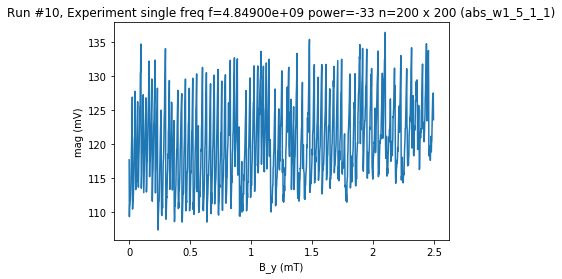

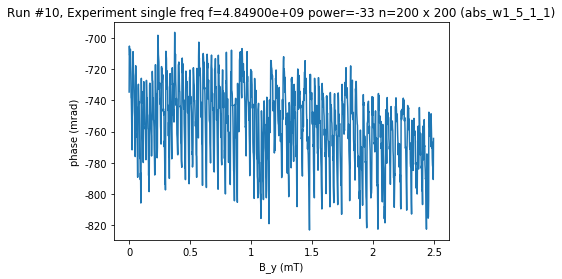

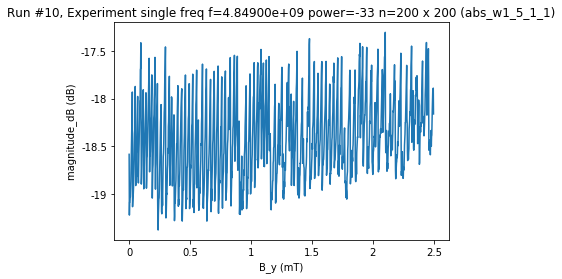

In [115]:
plot_by_id(10)

database set to D:\OneDrive\BF3\Data\\20190509_ABS_W1_5_1_1.db
30400.0
32.8947368421 uT period


Text(0.5,1,'FFT of #10 20190509')

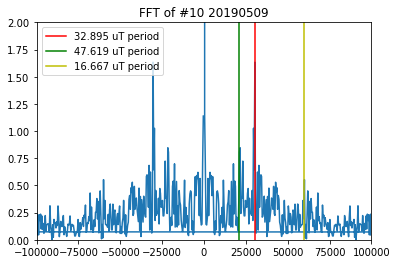

In [171]:
datestamp = '20190509'
initialize_database('20190509')
data_id=10
freqs, mag_fft, phase_fft = get_fft(data_id, imin=0,imax=1800)
plt.figure()
plt.plot(freqs, mag_fft)
plt.xlim(-1e5,1e5)
max_fft = freqs[np.argmax(mag_fft[2:int(len(mag_fft) /2)]) + 2]

plt.axvline(x=max_fft,color='r', label=('%.3f uT period' % ((1/max_fft) * 1e6)))
plt.axvline(x=21e3,color='g', label=('%.3f uT period' % ((1/21e3) * 1e6)))
plt.axvline(x=60e3,color='y', label=('%.3f uT period' % ((1/60e3) * 1e6)))
plt.ylim(0,2)
print(max_fft)
print(1/max_fft * 1e6,'uT period' )
plt.legend()
plt.title('FFT of #%d %s' %(data_id, datestamp))

([<matplotlib.axes._subplots.AxesSubplot at 0x1c299a70438>,
 [None, None, None])

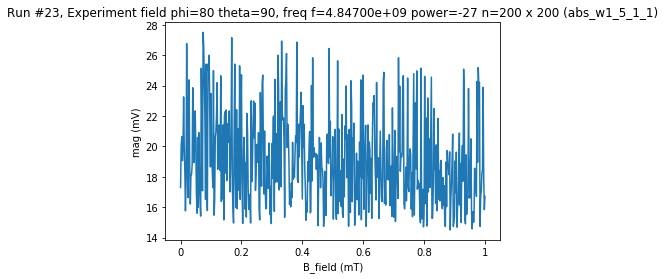

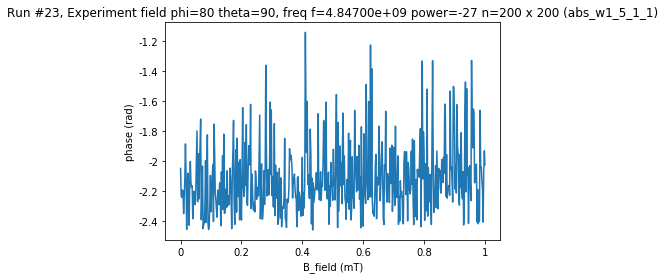

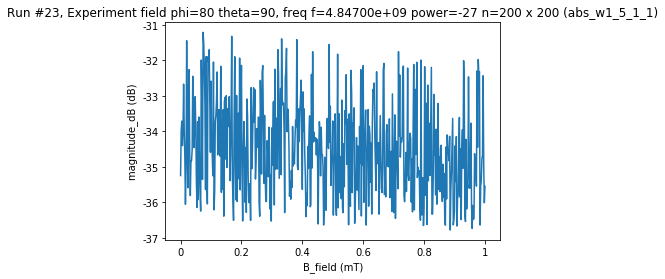

In [129]:
plot_by_id(23)

database set to D:\OneDrive\BF3\Data\\20190509_ABS_W1_5_1_1.db
57949.8922989
17.2562874637 uT period


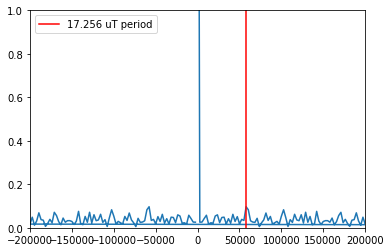

In [149]:
initialize_database('20190509')
freqs, mag_fft, phase_fft = get_fft(37)
plt.figure()
plt.plot(freqs, mag_fft)
plt.xlim(-2e5,2e5)
max_fft = freqs[np.argmax(mag_fft[2:int(len(mag_fft) /2)]) + 2]
plt.axvline(x=max_fft,color='r', label=('%.3f uT period' % ((1/max_fft) * 1e6)))
plt.ylim(0,1)
print(max_fft)
print(1/max_fft * 1e6,'uT period' )
plt.legend()

In [155]:
2e-15 / (38e-6)

5.263157894736842e-11

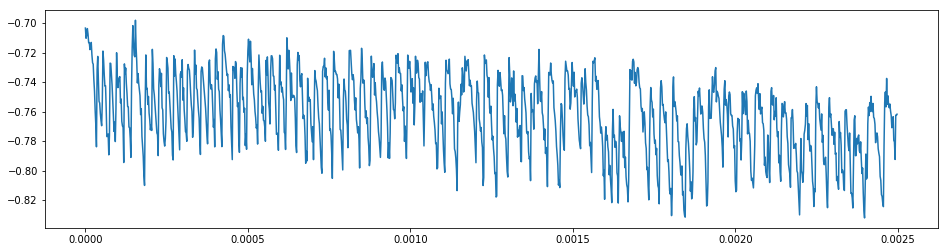

In [102]:
dat = load_by_id(8)
Bs = np.squeeze(dat.get_data('B_y'))
mag = np.squeeze(dat.get_data('phase'))
plt.figure(figsize=(16,4))
plt.plot(Bs, mag)

Text(0.5,0,'B_y (T)')

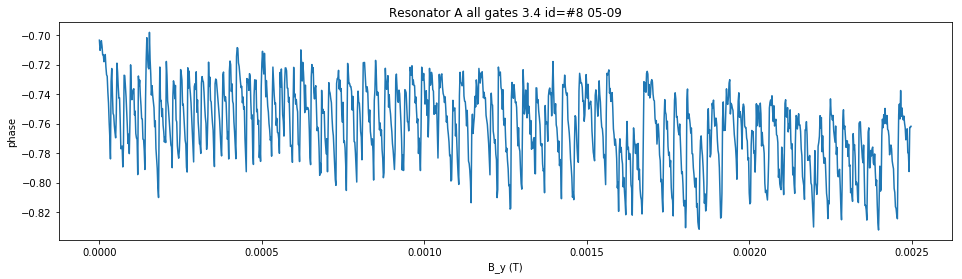

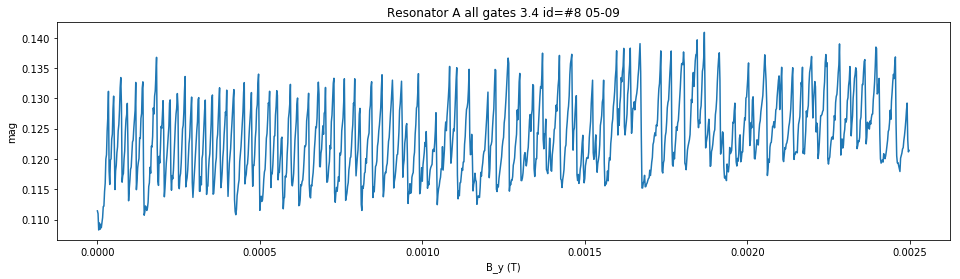

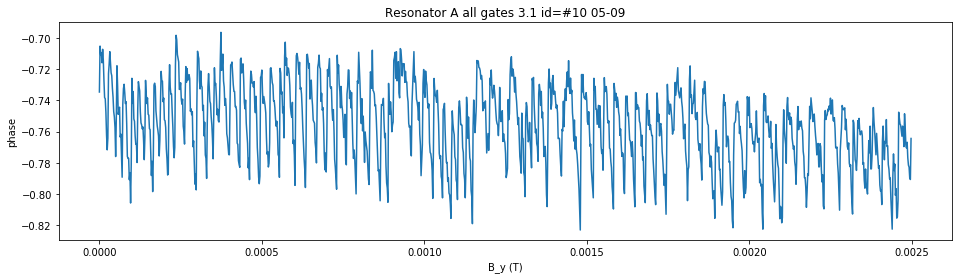

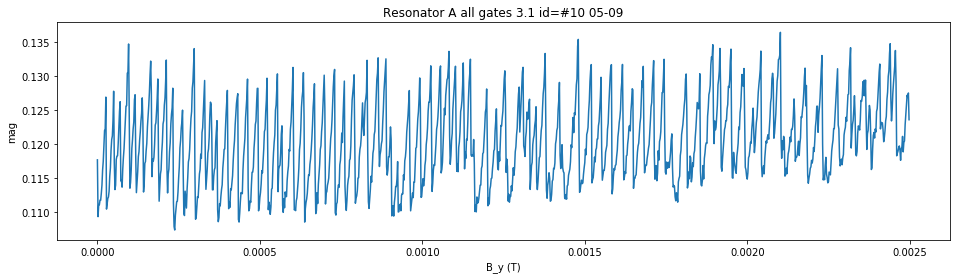

In [118]:
dat = load_by_id(8)
Bs = np.squeeze(dat.get_data('B_y'))
mag = np.squeeze(dat.get_data('phase'))
plt.figure(figsize=(16,4))
plt.plot(Bs, mag)
plt.title('Resonator A all gates 3.4 id=#8 05-09')
plt.ylabel('phase')
plt.xlabel('B_y (T)')

Bs = np.squeeze(dat.get_data('B_y'))
mag = np.squeeze(dat.get_data('mag'))
plt.figure(figsize=(16,4))
plt.plot(Bs, mag)
plt.title('Resonator A all gates 3.4 id=#8 05-09')
plt.ylabel('mag')
plt.xlabel('B_y (T)')


dat = load_by_id(10)
Bs = np.squeeze(dat.get_data('B_y'))
mag = np.squeeze(dat.get_data('phase'))
plt.figure(figsize=(16,4))
plt.plot(Bs, mag)
plt.title('Resonator A all gates 3.1 id=#10 05-09')
plt.ylabel('phase')
plt.xlabel('B_y (T)')


Bs = np.squeeze(dat.get_data('B_y'))
mag = np.squeeze(dat.get_data('mag'))
plt.figure(figsize=(16,4))
plt.plot(Bs, mag)
plt.title('Resonator A all gates 3.1 id=#10 05-09')
plt.ylabel('mag')
plt.xlabel('B_y (T)')


Text(0.5,0,'B_y (T)')

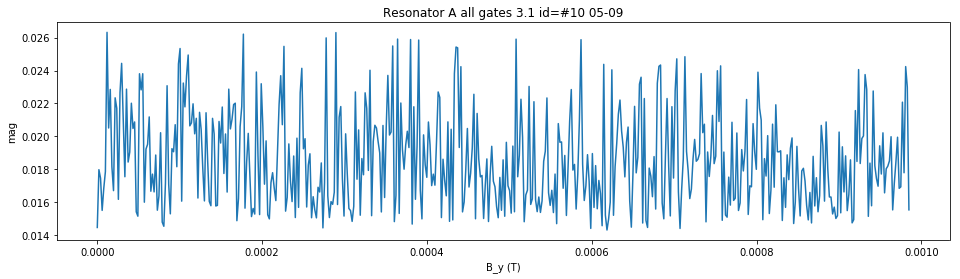

In [208]:
%matplotlib inline
dat = load_by_id(32)
Bs = np.squeeze(dat.get_data('B_y'))
mag = np.squeeze(dat.get_data('mag'))
plt.figure(figsize=(16,4))
plt.plot(Bs, mag)
plt.title('Resonator A all gates 3.1 id=#32 05-09')
plt.ylabel('mag')
plt.xlabel('B_y (T)')

0.757366
puck 0.0235913
mc 0.0093144


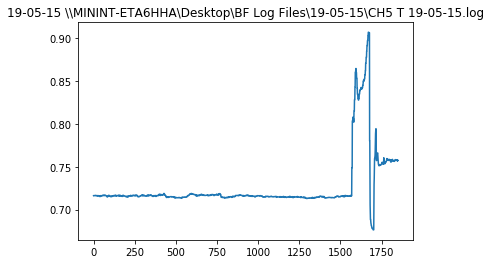

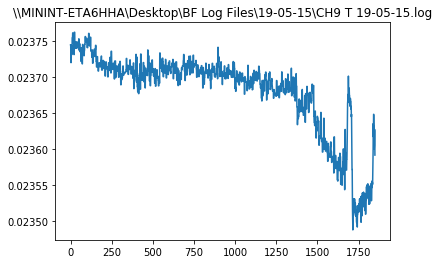

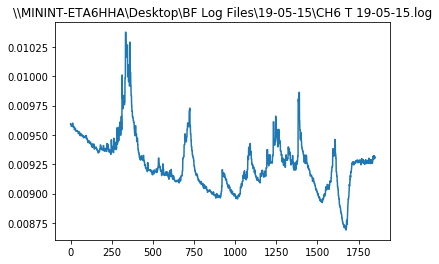

In [312]:
import csv
BF_PC_PATH = '\\\\MININT-ETA6HHA\\Desktop\\BF Log Files\\' 
import time

logfile_name = 'CH5 T'
days_in_the_past =0
ts = datetime.datetime.today() - datetime.timedelta(days=days_in_the_past)



ds = '%02d-%02d-%02d'%(ts.year-2000, ts.month, ts.day)

#ds = '19-04-23'

pth = BF_PC_PATH + ds + '\\' + logfile_name+ ' ' + ds+'.log'

T = np.loadtxt(pth, usecols = (2), delimiter = ',')
 
plt.figure()
plt.plot(T)
plt.title(ds + ' ' + pth)
print(T[-1])


logfile_name = 'CH9 T'
pth = BF_PC_PATH + ds + '\\' + logfile_name+ ' ' + ds+'.log'

T = np.loadtxt(pth, usecols = (2), delimiter = ',')
plt.figure()
plt.plot(T)
plt.title(pth)
#plt.ylim(0,0.3)
print('puck',T[-1])


logfile_name = 'CH6 T'
pth = BF_PC_PATH + ds + '\\' + logfile_name+ ' ' + ds+'.log'

T = np.loadtxt(pth, usecols = (2), delimiter = ',')
plt.figure()
plt.plot(T)
plt.title(pth)
#plt.ylim(0,0.3)
print('mc', T[-1])

KeyboardInterrupt: 

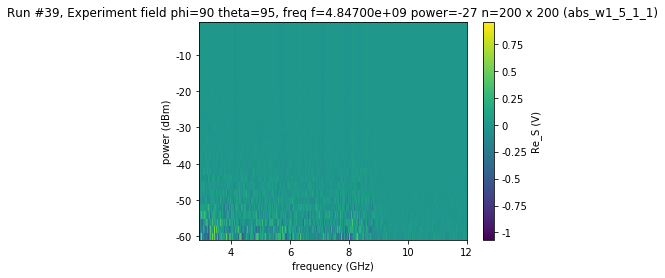

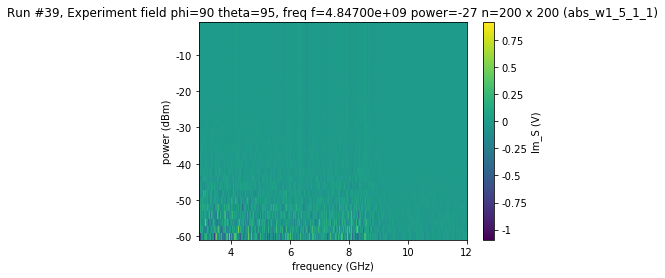

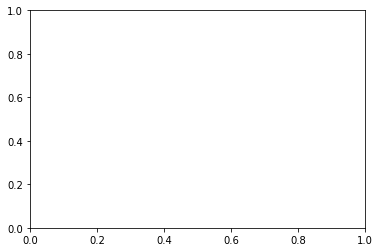

In [200]:
plot_by_id(39)

([<matplotlib.axes._subplots.AxesSubplot at 0x1c30bcca4e0>,
  <matplotlib.colorbar.Colorbar at 0x1c30c248d68>])

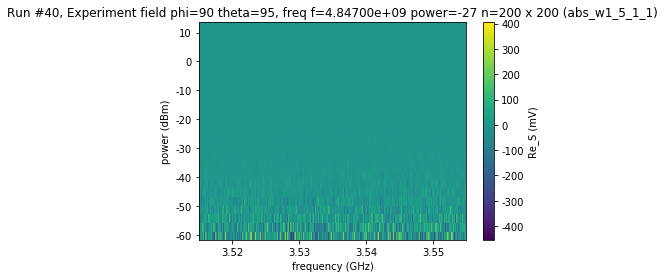

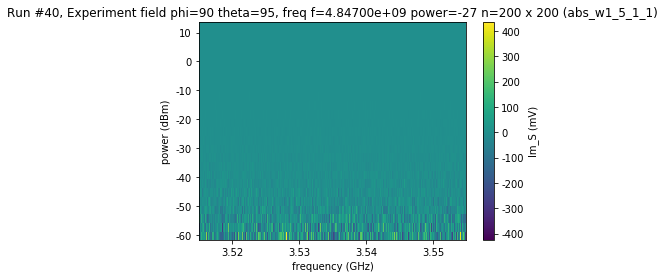

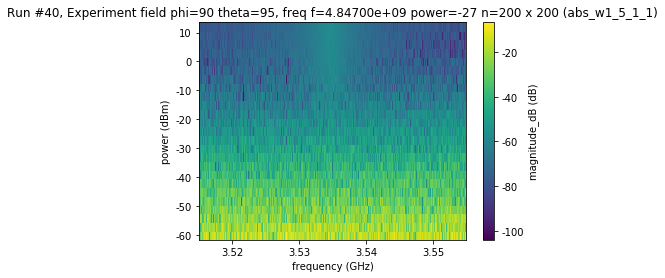

In [201]:
plot_by_id(40)

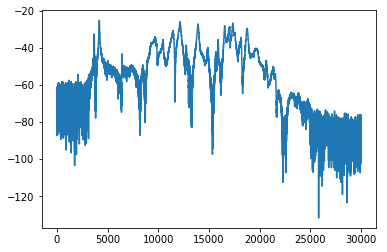

In [252]:
data = load_by_id(39)

plt.figure()
plt.plot(np.squeeze(data.get_data('magnitude_dB'))[-1,:])

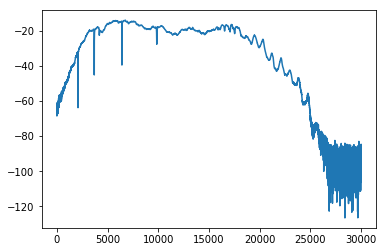

In [250]:
data = load_by_id(49)

plt.figure()
plt.plot(np.squeeze(data.get_data('magnitude_dB')))

 ...]

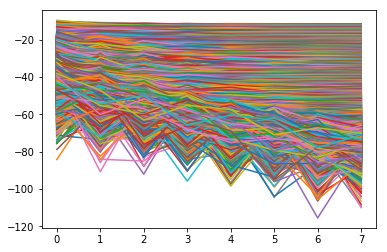

In [254]:
data = load_by_id(51)

plt.figure()
plt.plot(np.squeeze(data.get_data('magnitude_dB')))

Text(0.5,1,'id=64')

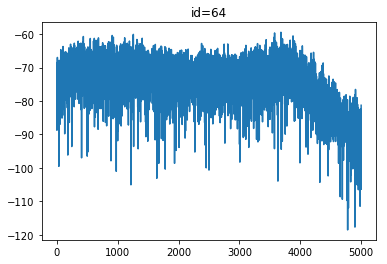

In [467]:
data = load_by_id(92)

plt.figure()
plt.plot(np.squeeze(data.get_data('magnitude_dB'))[0,:])
plt.title('id=64')

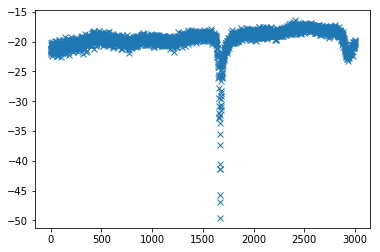

In [279]:
plt.plot(np.squeeze(data.get_data('magnitude_dB'))[0,1000:4000],'x')

([<matplotlib.axes._subplots.AxesSubplot at 0x1c355e097f0>,
 [None, None, None])

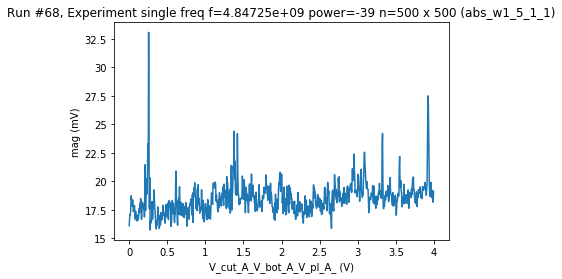

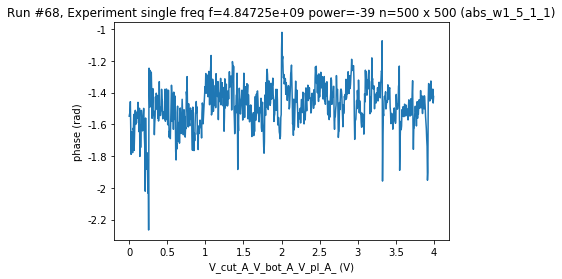

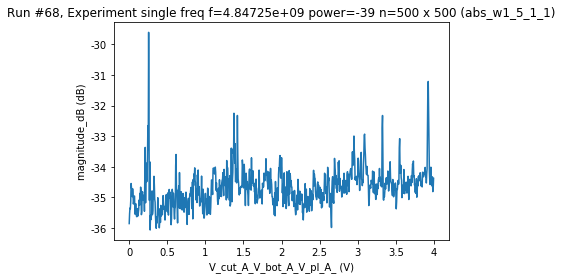

In [305]:
plot_by_id(68)

([<matplotlib.axes._subplots.AxesSubplot at 0x1c34a734710>,
 [None, None, None, None])

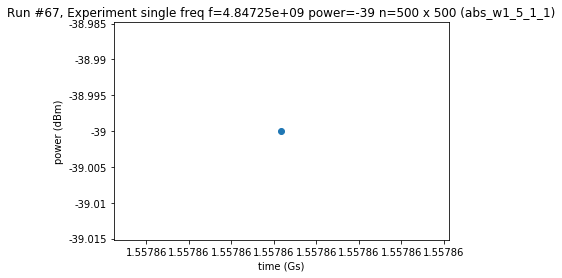

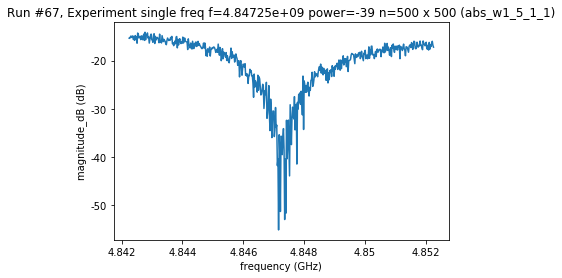

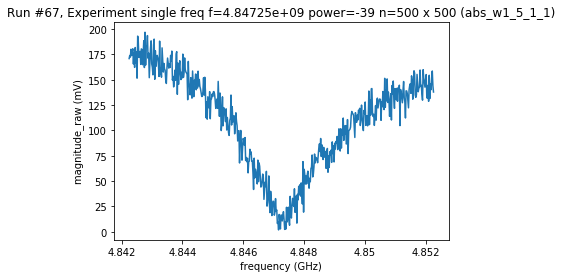

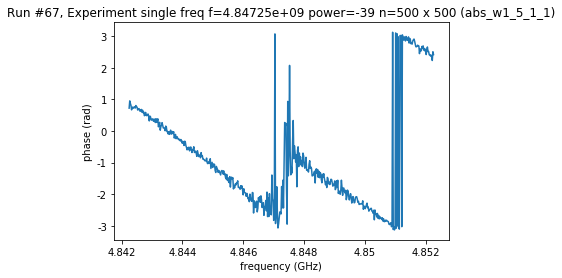

In [292]:
plot_by_id(67)

([<matplotlib.axes._subplots.AxesSubplot at 0x1c358a3eb70>,
 [None, None, None])

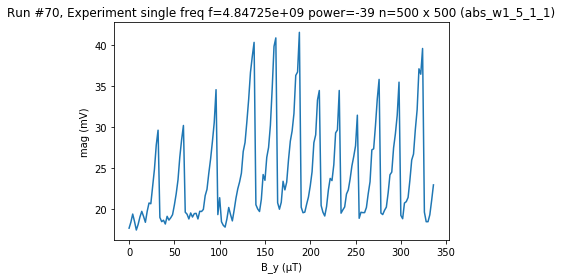

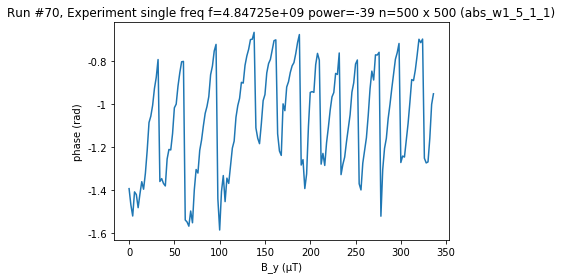

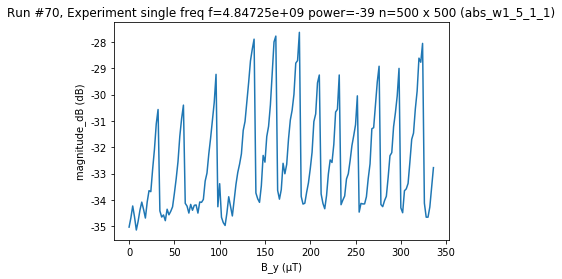

In [314]:
plot_by_id(70)

database set to D:\OneDrive\BF3\Data\\20190509_ABS_W1_5_1_1.db
43859.6491228
22.8 uT period


Text(0.5,1,'FFT of #70 20190509')

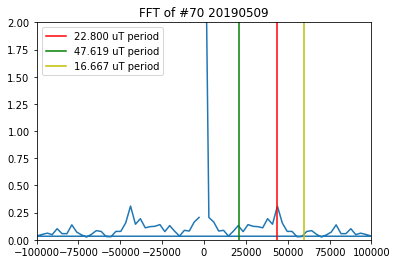

In [315]:
datestamp = '20190509'
initialize_database('20190509')
data_id=70
freqs, mag_fft, phase_fft = get_fft(data_id, imin=0,imax=1800)
plt.figure()
plt.plot(freqs, mag_fft)
plt.xlim(-1e5,1e5)
max_fft = freqs[np.argmax(mag_fft[2:int(len(mag_fft) /2)]) + 2]

plt.axvline(x=max_fft,color='r', label=('%.3f uT period' % ((1/max_fft) * 1e6)))
plt.axvline(x=21e3,color='g', label=('%.3f uT period' % ((1/21e3) * 1e6)))
plt.axvline(x=60e3,color='y', label=('%.3f uT period' % ((1/60e3) * 1e6)))
plt.ylim(0,2)
print(max_fft)
print(1/max_fft * 1e6,'uT period' )
plt.legend()
plt.title('FFT of #%d %s' %(data_id, datestamp))

In [330]:
plot_by_id(77)

ValueError: Run with run_id 77 does not exist in the database

In [343]:
dat = load_by_id(81)

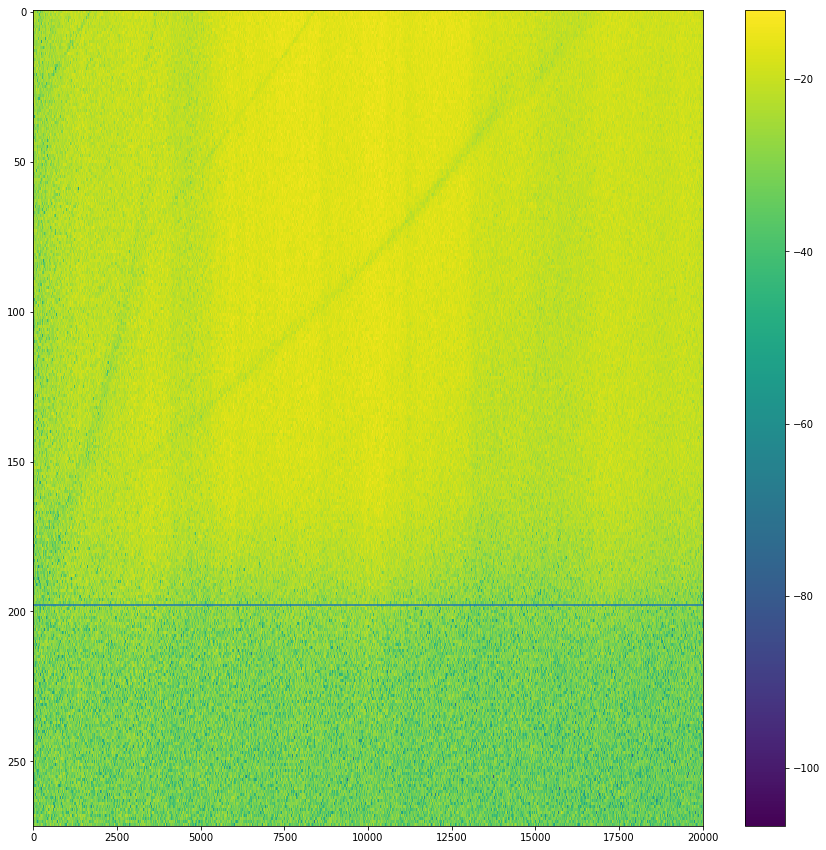

In [429]:
dat = load_by_id(81)
plt.figure(figsize=(15,15))
plt.imshow(np.squeeze(dat.get_data('magnitude_dB')), aspect='auto')
plt.colorbar()
plt.axhline(y=198)

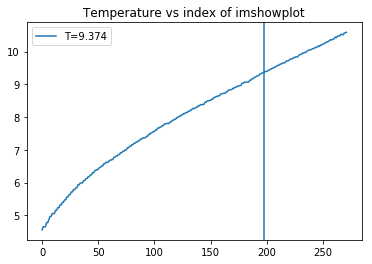

In [432]:
plt.plot(np.squeeze(dat.get_data('temperature')))
plt.title('Temperature vs index of imshowplot')
plt.axvline(x=198, label='T=%.3f' % np.squeeze(dat.get_data('temperature'))[198])
plt.legend()

10.5934
8.07771


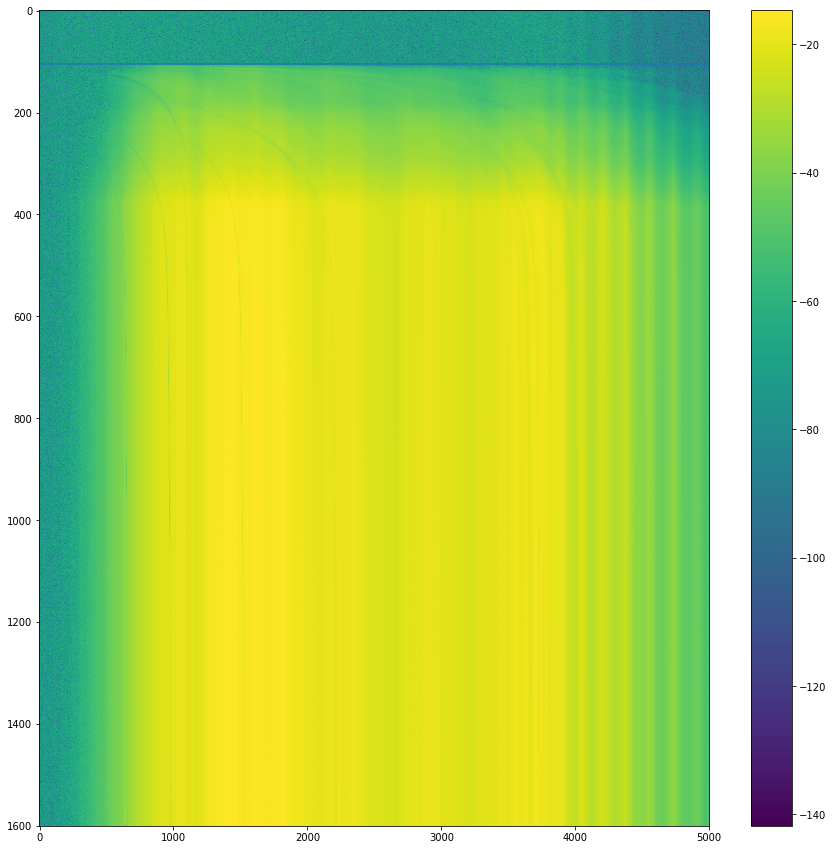

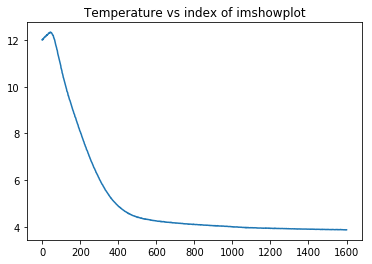

In [481]:
dat = load_by_id(92)
plt.figure(figsize=(15,15))
plt.imshow(np.squeeze(dat.get_data('magnitude_dB')), aspect='auto')
plt.colorbar()
plt.axhline(y=105)
plt.figure()
plt.plot(np.squeeze(dat.get_data('temperature')))
plt.title('Temperature vs index of imshowplot')
print(np.squeeze(dat.get_data('temperature'))[105])
print(np.squeeze(dat.get_data('temperature'))[200])